In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
path = '/content/drive/MyDrive/OPI/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv'

df = pd.read_csv(path,encoding = 'utf-8')

In [3]:
df.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2017.0,Octubre,2017-10-06 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-3SD,IZTAPALAPA,APATLACO,2017,Noviembre,2017-11-15 20:14:33,REAL DEL MONTE,NaN,-99.116256,19.380585,"19.3805845107,-99.1162559436"
1,2017.0,Noviembre,2017-11-15 20:00:00,PERDIDA DE LA VIDA POR OTRAS CAUSAS,HECHO NO DELICTIVO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-3CD,TLALPAN,MIGUEL HIDALGO 2A SECCIÓN,2017,Noviembre,2017-11-15 20:15:06,JESUS LECUONA,OAXACA,-99.193514,19.286033,"19.2860327788,-99.1935140733"
2,2017.0,Noviembre,2017-11-15 18:30:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-3SD,IZTAPALAPA,DR. ALFONSO ORTIZ TIRADO,2017,Noviembre,2017-11-15 20:18:33,SAN RAFAEL ATLIXCO,NaN,-99.073700,19.387269,"19.3872690138,-99.0736999107"
3,2017.0,Noviembre,2017-11-15 17:32:00,ROBO DE MOTOCICLETA CON VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-2,UI-1SD,MIGUEL HIDALGO,LOMAS DE SOTELO I,2017,Noviembre,2017-11-15 20:19:27,AV. INGENIEROS MILITARES,NaN,-99.217985,19.453354,"19.4533537449,-99.2179851004"
4,2017.0,Noviembre,2017-11-14 19:00:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-3SD,IZTAPALAPA,2A. AMPLIACIÓN SANTIAGO ACAHUALTEPEC,2017,Noviembre,2017-11-15 20:20:20,EVA SAMANO,LEONA VICARIO,-99.012944,19.347705,"19.3477045484,-99.012944086"


**1.-¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario
hacerlas. Sólo describe la prueba y qué te dice cada una.**

De manera muy general: revisar si datos numéricos corresponden con tipo int. o float. Revisar si las fechas estan guardadas como tipo 'timestamp' o similar. Revisar el número de columnas con datos null. 

Esto revisión se puede empezar a hacer viendo lo siguiente:


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101099 entries, 0 to 1101098
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1100677 non-null  float64
 1   mes_hechos            1100677 non-null  object 
 2   fecha_hechos          1100930 non-null  object 
 3   delito                1101099 non-null  object 
 4   categoria_delito      1101099 non-null  object 
 5   fiscalia              1101099 non-null  object 
 6   agencia               1101099 non-null  object 
 7   unidad_investigacion  1100872 non-null  object 
 8   alcaldia_hechos       1097996 non-null  object 
 9   colonia_hechos        1056348 non-null  object 
 10  ao_inicio             1101099 non-null  int64  
 11  mes_inicio            1101099 non-null  object 
 12  fecha_inicio          1101099 non-null  object 
 13  calle_hechos          1098220 non-null  object 
 14  calle_hechos2         434974 non-n

In [5]:
# Podemos ver cuantos datos nulos hay por columna. 

df.isna().sum()

ao_hechos                  422
mes_hechos                 422
fecha_hechos               169
delito                       0
categoria_delito             0
fiscalia                     0
agencia                      0
unidad_investigacion       227
alcaldia_hechos           3103
colonia_hechos           44751
ao_inicio                    0
mes_inicio                   0
fecha_inicio                 0
calle_hechos              2879
calle_hechos2           666125
longitud                 43756
latitud                  43756
geopoint                 43756
dtype: int64

In [6]:
# De manera más ilustrativa, podemos ver el porcentaje de datos nulos hay por columna. 

(df.isna().sum()/len(df)*100) 

ao_hechos                0.038325
mes_hechos               0.038325
fecha_hechos             0.015348
delito                   0.000000
categoria_delito         0.000000
fiscalia                 0.000000
agencia                  0.000000
unidad_investigacion     0.020616
alcaldia_hechos          0.281809
colonia_hechos           4.064212
ao_inicio                0.000000
mes_inicio               0.000000
fecha_inicio             0.000000
calle_hechos             0.261466
calle_hechos2           60.496377
longitud                 3.973848
latitud                  3.973848
geopoint                 3.973848
dtype: float64

In [ ]:
## Vemos que en la columna 'calle_hechos2' faltan el 60% de los datos approx. 
## Fuera de eso, nunca falta más del 4%, por lo que casi con seguridad podríamos prescindir de esas filas
## Sin embargo, en este caso o dejaremos así por el momento. 

**2 - Delitos en la tabla**

In [7]:
## Si considero que no hay sobreconteo de delitos, puedo suponer que es igual al número de entradas. 

len(df)

1101099

In [8]:
## El rango de tiempo

print(' Año min: ',df['ao_hechos'].min(),'\n','Año max: ',df['ao_hechos'].max())

 Año min:  1906.0 
 Año max:  2020.0


Son demasiado años, así que en algún momento seguro tendremos que imponer un cutoff en el número de años.

**3 - ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más
frecuentes?**

In [9]:
## La división más grande que podemos hacer es por alcaldias

df['alcaldia_hechos'].unique()

array(['IZTAPALAPA', 'TLALPAN', 'MIGUEL HIDALGO', 'IZTACALCO',
       'CUAUHTEMOC', 'BENITO JUAREZ', 'CUAJIMALPA DE MORELOS',
       'GUSTAVO A MADERO', 'VENUSTIANO CARRANZA', 'ALVARO OBREGON',
       'COYOACAN', 'AZCAPOTZALCO', 'MILPA ALTA', 'XOCHIMILCO',
       'LA MAGDALENA CONTRERAS', 'TLAHUAC', 'TLALNEPANTLA DE BAZ',
       'VALLE DE CHALCO SOLIDARIDAD', 'TIANGUISTENCO', 'LA PAZ',
       'CHIMALHUACAN', 'NEZAHUALCOYOTL', 'ECATEPEC DE MORELOS',
       'NAUCALPAN DE JUAREZ', 'SAN MARTIN TEXMELUCAN', 'CHALCO',
       'HUIXQUILUCAN', 'JILOTEPEC', 'TLALTIZAPAN', 'SIN DATO', nan,
       'TULTEPEC', 'IXTAPALUCA', 'MALINALCO', 'ZINACANTEPEC',
       'CUERNAVACA', 'CULIACAN', 'COACALCO DE BERRIOZABAL', 'TAMPICO',
       'YECAPIXTLA', 'PACHUCA DE SOTO', 'AHOME', 'TEXCOCO', 'TIJUANA',
       'EL BOSQUE', 'MERIDA', 'GUADALAJARA', 'TOLUCA', 'COLON',
       'ATIZAPAN DE ZARAGOZA', 'OCOYOACAC', 'NICOLAS ROMERO',
       'EZEQUIEL MONTES', 'GUANAJUATO', 'JIQUIPILCO', 'TULTITLAN',
       'EDUARDO N

In [10]:
## Son demasiadas alcaldias!!

df['alcaldia_hechos'].nunique()

529

In [ ]:
## Esto puede ser por razones históricas, o simplemente porque hay un conteo de alcaldías en la periferia de la CDMX
## Nos limitaremos a las alcaldías de la CDMX propiamente. 

In [11]:
alcaldias_cdmx = ['AZCAPOTZALCO','MIGUEL HIDALGO','GUSTAVO A MADERO','CUAUHTEMOC','VENUSTIANO CARRANZA', 'ALVARO OBREGON',
       'COYOACAN', 'MILPA ALTA', 'XOCHIMILCO',
       'LA MAGDALENA CONTRERAS', 'TLAHUAC','IZTAPALAPA','IZTACALCO','BENITO JUAREZ','TLALPAN','CUAJIMALPA DE MORELOS']

In [12]:
df_cdmx = df[df['alcaldia_hechos'].isin(alcaldias_cdmx)]

In [13]:
## También: nos limitaremos a los ultimos 30 años. Es muy probable que datos anteriores metan ruido innecesario en todo lo que sigue. 

df_cdmx = df_cdmx[df_cdmx['ao_hechos']>=1990]

In [14]:
## Cuales son los 5 delitos más frecuentes?

for index in df_cdmx['delito'].value_counts(1).head(5).index:
  print('--',index,': ',round(df_cdmx['delito'].value_counts(1).head(5).loc[index]*100,2),'% de delitos totales')
  #print('\n')

-- VIOLENCIA FAMILIAR :  9.68 % de delitos totales
-- ROBO DE OBJETOS :  6.02 % de delitos totales
-- ROBO A NEGOCIO SIN VIOLENCIA :  5.97 % de delitos totales
-- FRAUDE :  5.91 % de delitos totales
-- AMENAZAS :  5.17 % de delitos totales


In [ ]:
## Cuales son las 5 categorias de delito más frecuentes?

for index in df_cdmx['categoria_delito'].value_counts(1).head(5).index:
  print('--',index,': ',round(df_cdmx['categoria_delito'].value_counts(1).head(5).loc[index]*100,2),'% de categorias de delito totales')
  #print('\n')

-- DELITO DE BAJO IMPACTO :  77.64 % de categorias de delito totales
-- ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA :  5.8 % de categorias de delito totales
-- ROBO DE VEHÍCULO CON Y SIN VIOLENCIA :  5.37 % de categorias de delito totales
-- HECHO NO DELICTIVO :  4.86 % de categorias de delito totales
-- ROBO A NEGOCIO CON VIOLENCIA :  1.69 % de categorias de delito totales


In [ ]:
### Vemos ahora la distribución de delitos por alcaldia


for index in ((df_cdmx.groupby('alcaldia_hechos')['delito'].count()/len(df_cdmx))*100).index:
  print(index,':             ',round(((df_cdmx.groupby('alcaldia_hechos')['delito'].count()/len(df_cdmx))*100).loc[index],2),'% de delitos totales')

ALVARO OBREGON :              6.78 % de delitos totales
AZCAPOTZALCO :              4.89 % de delitos totales
BENITO JUAREZ :              8.53 % de delitos totales
COYOACAN :              6.73 % de delitos totales
CUAJIMALPA DE MORELOS :              1.47 % de delitos totales
CUAUHTEMOC :              15.94 % de delitos totales
GUSTAVO A MADERO :              10.1 % de delitos totales
IZTACALCO :              4.22 % de delitos totales
IZTAPALAPA :              15.19 % de delitos totales
LA MAGDALENA CONTRERAS :              1.59 % de delitos totales
MIGUEL HIDALGO :              6.62 % de delitos totales
MILPA ALTA :              0.68 % de delitos totales
TLAHUAC :              2.4 % de delitos totales
TLALPAN :              5.9 % de delitos totales
VENUSTIANO CARRANZA :              5.83 % de delitos totales
XOCHIMILCO :              3.14 % de delitos totales


In [ ]:
## Parece que la alcaldia con más delitos es Cuauhtemoc.

**4 - Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten
cuidado con los delitos con pocas ocurrencias).**

In [15]:

## Podríamos hacer una serie de tiempo, pero la el análsis más simple y correcta es utilizando comportamientos globales.
## Tenemos que definir qué es 'el último año'. Es decir, el data set puede terminar a mediados del 2019, 
## mientras que nosotros queremos información en bloques de 365 días. 
## Primero, hacemos la conversion de los datos a tipo datastamp

# Hacemos conversion estandar a formato datetime. Definimos algunas columnas extra
df_cdmx['datetime_hechos'] = pd.to_datetime(df_cdmx['fecha_hechos'])
df_cdmx['mes']=df_cdmx['datetime_hechos'].apply(lambda x: x.month)
df_cdmx['dia_semana']=df_cdmx['datetime_hechos'].apply(lambda x: x.weekday())
df_cdmx['hora']=df_cdmx['datetime_hechos'].apply(lambda x: x.hour)
df_cdmx['fecha_simple']=df_cdmx['datetime_hechos'].apply(lambda x: x.date())


In [13]:
df_cdmx.head(3)

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,datetime_hechos,mes,dia_semana,hora,fecha_simple
0,2017.0,Octubre,2017-10-06 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-3SD,IZTAPALAPA,APATLACO,2017,Noviembre,2017-11-15 20:14:33,REAL DEL MONTE,NaN,-99.116256,19.380585,"19.3805845107,-99.1162559436",2017-10-06 12:00:00,10,4,12,2017-10-06
1,2017.0,Noviembre,2017-11-15 20:00:00,PERDIDA DE LA VIDA POR OTRAS CAUSAS,HECHO NO DELICTIVO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-3CD,TLALPAN,MIGUEL HIDALGO 2A SECCIÓN,2017,Noviembre,2017-11-15 20:15:06,JESUS LECUONA,OAXACA,-99.193514,19.286033,"19.2860327788,-99.1935140733",2017-11-15 20:00:00,11,2,20,2017-11-15
2,2017.0,Noviembre,2017-11-15 18:30:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-3SD,IZTAPALAPA,DR. ALFONSO ORTIZ TIRADO,2017,Noviembre,2017-11-15 20:18:33,SAN RAFAEL ATLIXCO,NaN,-99.073700,19.387269,"19.3872690138,-99.0736999107",2017-11-15 18:30:00,11,2,18,2017-11-15


In [16]:
## La ultima fecha de registro es:

last_date = df_cdmx['fecha_simple'].max()
last_date

datetime.date(2020, 10, 31)

In [17]:
# Nos enfocamos en 3 años exactos desde la última fecha de registro en los datos (approx)
df_year = df_cdmx[(df_cdmx['fecha_simple'] >= datetime.date(2017,10,31))  ] 
df_year['fecha_simple'].min(),df_year['fecha_simple'].max()

(datetime.date(2017, 10, 31), datetime.date(2020, 10, 31))

In [18]:
# Definimos una columna donde etiquetamos cada uno de nuestros años definidos arriba como años 1, 2 y 3.

## Solo para clarificar: año 1: va de periodo 2017-2018
## Año 2: va de periodo 2018-2019
## Año 3: va de periodo 2019-2020 

def year_def(x):
  if (x >= datetime.date(2017,10,31)) and (x <= datetime.date(2018,10,30)):
    return 1
  elif (x >= datetime.date(2018,10,31)) and (x <= datetime.date(2019,10,30)):
    return 2
  elif (x >= datetime.date(2019,10,31)) and (x <= datetime.date(2020,10,31)):
    return 3
  else:
    return 0 

df_year['numero_año'] = df_year['fecha_simple'].apply(lambda x: year_def(x)) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
df_year[['fecha_simple','numero_año']]

,fecha_simple,numero_año
1,2017-11-15,1
2,2017-11-15,1
3,2017-11-15,1
4,2017-11-14,1
7,2017-11-15,1
...,...,...
1101094,2020-10-31,3
1101095,2020-10-31,3
1101096,2020-10-31,3
1101097,2020-10-31,3


In [20]:
## Cuáles son los delitos totales cometidos en estos años:

df_year['numero_año'].value_counts()

1    247188
2    243667
3    192879
Name: numero_año, dtype: int64

In [ ]:
## Curioso: año más violento de los tres es primero (periodo 2017-2018)
## Más aún, los delitos disminuyeron notablemente en el último año. 

In [ ]:
## Para identificar delitos particulares a la alza o a la baja, tenemos que escoger esos delitos.
## Vamos a escoger delitos que sean mayor al 1% del total en esos tres años:

In [21]:
delitos_relevantes = []
for index in df_year['delito'].value_counts(1).head(26).index:
  print('--',index,': ',round(df_year['delito'].value_counts(1).head(26).loc[index]*100,2),'% de delitos totales')
  delitos_relevantes.append(index)
  #print('\n')

-- VIOLENCIA FAMILIAR :  10.3 % de delitos totales
-- ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA :  6.38 % de delitos totales
-- ROBO A NEGOCIO SIN VIOLENCIA :  5.7 % de delitos totales
-- AMENAZAS :  5.52 % de delitos totales
-- FRAUDE :  5.4 % de delitos totales
-- ROBO DE OBJETOS :  5.27 % de delitos totales
-- ROBO DE ACCESORIOS DE AUTO :  3.57 % de delitos totales
-- ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO :  3.0 % de delitos totales
-- ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA :  2.73 % de delitos totales
-- ROBO A CASA HABITACION SIN VIOLENCIA :  2.47 % de delitos totales
-- NARCOMENUDEO POSESION SIMPLE :  2.09 % de delitos totales
-- ROBO A NEGOCIO CON VIOLENCIA :  1.73 % de delitos totales
-- DESPOJO :  1.57 % de delitos totales
-- ABUSO DE CONFIANZA :  1.54 % de delitos totales
-- DENUNCIA DE HECHOS :  1.52 % de delitos totales
-- DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL :  1.47 % de delitos totales
-- ROBO A PASAJERO / CONDUCTOR 

In [22]:
## Estos son los delitos que vamos a analizar
delitos_relevantes

['VIOLENCIA FAMILIAR',
 'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
 'ROBO A NEGOCIO SIN VIOLENCIA',
 'AMENAZAS',
 'FRAUDE',
 'ROBO DE OBJETOS',
 'ROBO DE ACCESORIOS DE AUTO',
 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
 'ROBO A CASA HABITACION SIN VIOLENCIA',
 'NARCOMENUDEO POSESION SIMPLE',
 'ROBO A NEGOCIO CON VIOLENCIA',
 'DESPOJO',
 'ABUSO DE CONFIANZA',
 'DENUNCIA DE HECHOS',
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
 'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
 'ABUSO SEXUAL',
 'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO',
 'LESIONES INTENCIONALES POR GOLPES',
 'USURPACIÓN DE IDENTIDAD',
 'PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓN, ALTERACIÓN O FALSIFICACIÓN DE TÍTULOS AL PORTADOR, DOCUMENTOS DE CRÉDITO PÚBLICOS O VALES DE CANJE',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA',
 'ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA',


In [23]:
## Definimos un dataframe solo con estos delitos

df_delitos = df_year[df_year['delito'].isin(delitos_relevantes)]

In [24]:
## Añadimos columnas con la cuenta total de estos delitos relevantes en los años 2 y 3:


delito_year_3 = []
count_year_3 = []


for index in df_delitos[df_delitos['numero_año'] == 3]['delito'].value_counts().index:
  delito_year_3.append(index)
  count_year_3.append(df_delitos[df_delitos['numero_año'] == 3]['delito'].value_counts().loc[index])

delito_year_2 = []
count_year_2 = []


for index in df_delitos[df_delitos['numero_año'] == 2]['delito'].value_counts().index:
  delito_year_2.append(index)
  count_year_2.append(df_delitos[df_delitos['numero_año'] == 2]['delito'].value_counts().loc[index])

df_3 = pd.DataFrame({'delito':delito_year_3,'cuenta_año_3':count_year_3})
df_2 = pd.DataFrame({'delito':delito_year_2,'cuenta_año_2':count_year_2})


In [25]:
## Definimos también el cambio porcentual en estos delitos al pasar del año 2 al año 3:

df_delitos_años = df_2.join(df_3.set_index('delito'),on='delito').fillna(0)
df_delitos_años['porcentaje_de_cambio'] = 100*(df_delitos_años['cuenta_año_3']-df_delitos_años['cuenta_año_2'])/df_delitos_años['cuenta_año_2']
df_delitos_años

,delito,cuenta_año_2,cuenta_año_3,porcentaje_de_cambio
0,VIOLENCIA FAMILIAR,24388,26252.0,7.643103
1,ROBO A NEGOCIO SIN VIOLENCIA,16174,7108.0,-56.052924
2,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,15197,8883.0,-41.547674
3,FRAUDE,13371,10607.0,-20.671603
4,AMENAZAS,13153,13765.0,4.652931
5,ROBO DE OBJETOS,12652,9008.0,-28.801770
6,ROBO DE ACCESORIOS DE AUTO,8440,7035.0,-16.646919
7,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,6839,5007.0,-26.787542
8,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,6800,5227.0,-23.132353
9,ROBO A CASA HABITACION SIN VIOLENCIA,6203,3785.0,-38.981138


In [26]:
## Así, al parecer vemos que los únicos delitos que aumentaron el último año son 'Violencia Familiar'
## y 'Amenazas'.

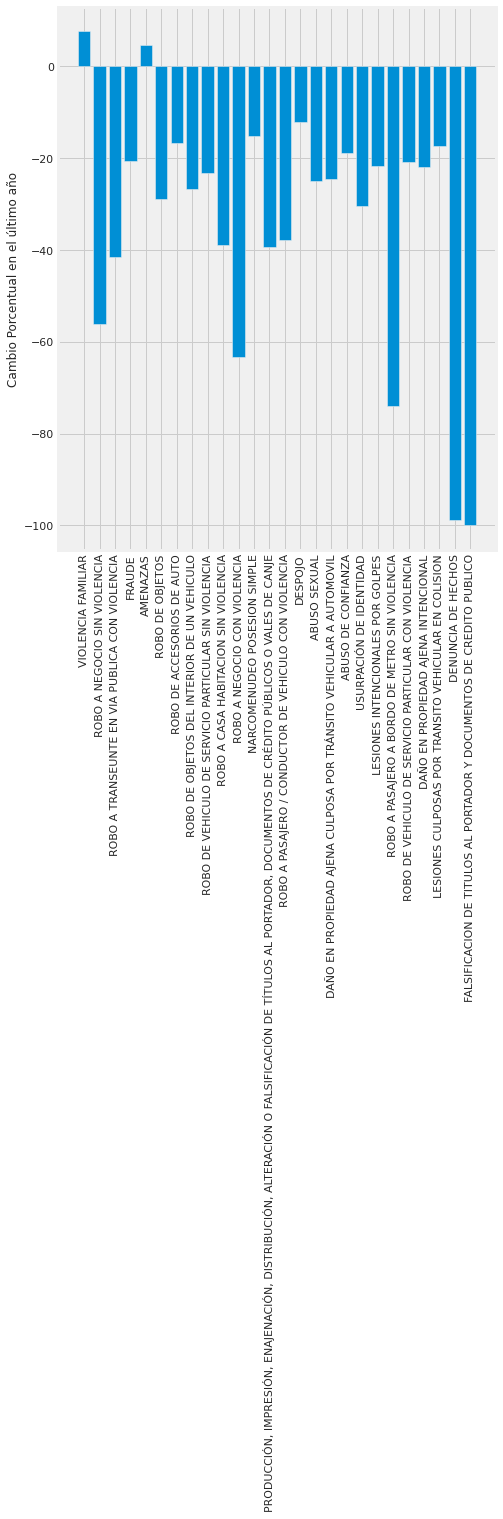

In [26]:
y = df_delitos_años['porcentaje_de_cambio']
x = df_delitos_años['delito']

plt.figure(figsize=(7,10))
plt.bar(x,y)
plt.ylabel('Cambio Porcentual en el último año')
plt.xticks(rotation=90)
plt.show()

**5 - ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea
esto?**

In [27]:
## Usamos el dataframe desde los 90's

alcaldia_lista = []
alcaldia_porcent = []

for index in ((df_cdmx.groupby('alcaldia_hechos')['delito'].count()/len(df_cdmx))*100).index:
  print('--',index,':             ',round(((df_cdmx.groupby('alcaldia_hechos')['delito'].count()/len(df_cdmx))*100).loc[index],2),'% de delitos totales')
  alcaldia_lista.append(index)
  alcaldia_porcent.append(round(((df_cdmx.groupby('alcaldia_hechos')['delito'].count()/len(df_cdmx))*100).loc[index],2))


-- ALVARO OBREGON :              6.78 % de delitos totales
-- AZCAPOTZALCO :              4.89 % de delitos totales
-- BENITO JUAREZ :              8.53 % de delitos totales
-- COYOACAN :              6.73 % de delitos totales
-- CUAJIMALPA DE MORELOS :              1.47 % de delitos totales
-- CUAUHTEMOC :              15.94 % de delitos totales
-- GUSTAVO A MADERO :              10.1 % de delitos totales
-- IZTACALCO :              4.22 % de delitos totales
-- IZTAPALAPA :              15.19 % de delitos totales
-- LA MAGDALENA CONTRERAS :              1.59 % de delitos totales
-- MIGUEL HIDALGO :              6.62 % de delitos totales
-- MILPA ALTA :              0.68 % de delitos totales
-- TLAHUAC :              2.4 % de delitos totales
-- TLALPAN :              5.9 % de delitos totales
-- VENUSTIANO CARRANZA :              5.83 % de delitos totales
-- XOCHIMILCO :              3.14 % de delitos totales


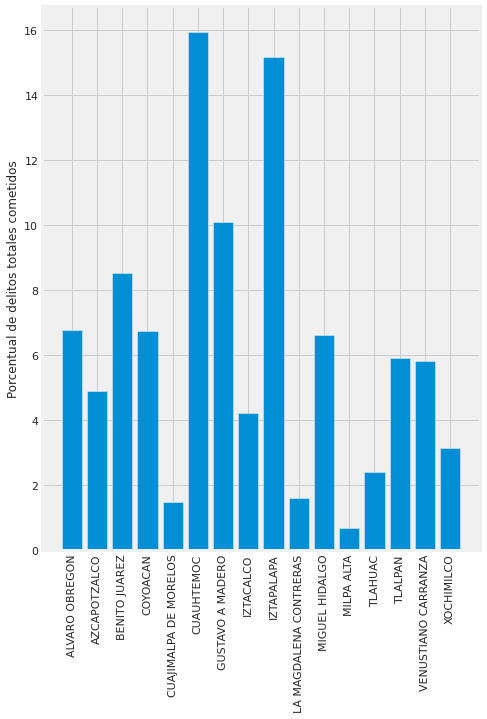

In [28]:
y = alcaldia_porcent
x = alcaldia_lista

plt.figure(figsize=(7,10))
plt.bar(x,y)
plt.ylabel('Porcentual de delitos totales cometidos')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## La alcaldía con mayor indice de delitos es Cuauhtemoc (15% de delitos totales)
## La alcaldía con menor índice de delitos es Milta Alta (0.7% de delitos totales)

## Una posible explicación es la densidad de población. 

**6 - Dentro de cada alcaldía, cuáles son las tres colonias con más delitos**

In [29]:
for alcaldia in alcaldias_cdmx:
  print('Alcaldia: ',alcaldia)
  print(df_cdmx[df_cdmx['alcaldia_hechos'] == alcaldia]['colonia_hechos'].value_counts().head(3))
  print(5*'=======')

Alcaldia:  AZCAPOTZALCO
EL ROSARIO                3812
INDUSTRIAL VALLEJO        2510
CENTRO DE AZCAPOTZALCO    2320
Name: colonia_hechos, dtype: int64
Alcaldia:  MIGUEL HIDALGO
POLANCO                           9444
ANAHUAC                           5059
LOMAS DE CHAPULTEPEC I SECCIÓN    4146
Name: colonia_hechos, dtype: int64
Alcaldia:  GUSTAVO A MADERO
LINDAVISTA             4873
GUADALUPE TEPEYAC      4475
SAN FELIPE DE JESÚS    3241
Name: colonia_hechos, dtype: int64
Alcaldia:  CUAUHTEMOC
CENTRO        37028
DOCTORES      21653
ROMA NORTE    13446
Name: colonia_hechos, dtype: int64
Alcaldia:  VENUSTIANO CARRANZA
JARDÍN BALBUENA         5954
MOCTEZUMA 2A SECCIÓN    4876
ZONA CENTRO             4304
Name: colonia_hechos, dtype: int64
Alcaldia:  ALVARO OBREGON
JARDINES DEL PEDREGAL    3337
SAN ANGEL                2663
ZEDEC SANTA FE           2543
Name: colonia_hechos, dtype: int64
Alcaldia:  COYOACAN
PEDREGAL DE SANTO DOMINGO    6325
AJUSCO                       3422
PEDREGAL DE SA

**7 - ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la
semana, quincenas)?**

In [ ]:
## Hacemos ahora un análisis temporal 
## Empecemos con el dataframe df_cdmx.


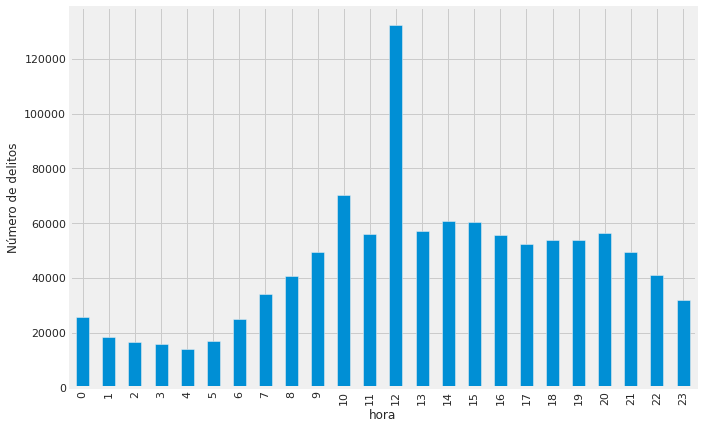

In [31]:
plt.figure(figsize=(10,7))
df_cdmx.groupby('hora')['ao_hechos'].count().plot(kind='bar')
plt.ylabel('Número de delitos')
plt.show()

In [ ]:
## Claramente hay un pico de delitos a las 12 hrs, mientras que en la madrugada hay un punto bajo. 

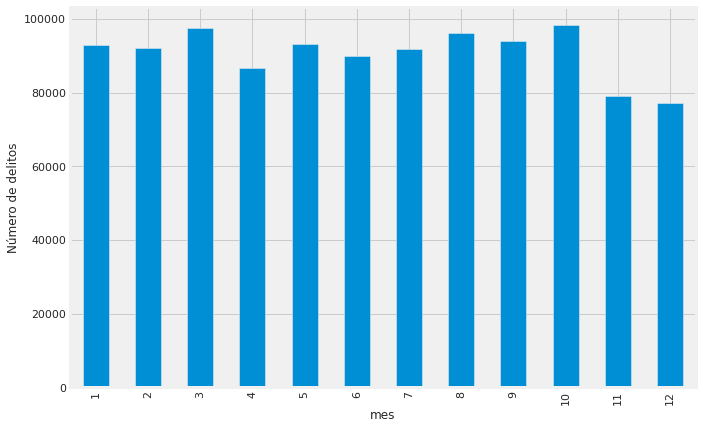

In [32]:
plt.figure(figsize=(10,7))
df_cdmx.groupby('mes')['ao_hechos'].count().plot(kind='bar')
plt.ylabel('Número de delitos')
plt.show()

In [ ]:
## Vemos que hay un ligero pico de delitos en marzo, agosto y septiembre, y un punto bajo en diciembre. Por lo demás,
## es bastante estable

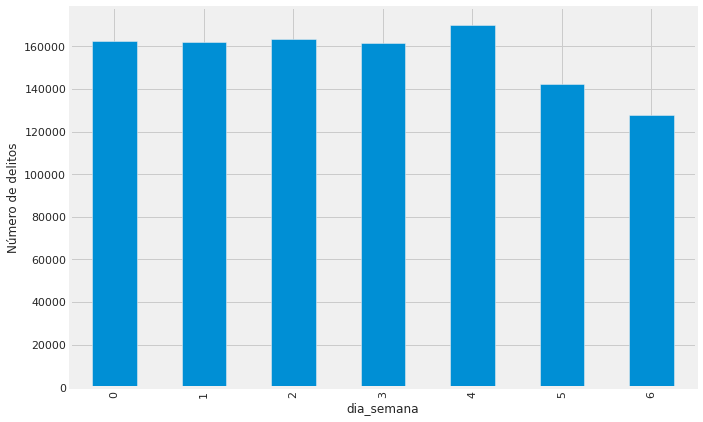

In [33]:
plt.figure(figsize=(10,7))
df_cdmx.groupby('dia_semana')['ao_hechos'].count().plot(kind='bar')
plt.ylabel('Número de delitos')
plt.show()

In [ ]:
## Por día de la semana: el máximo de delitos es el dia 4=viernes, mientras el mínimo es el día 6=domíngo.

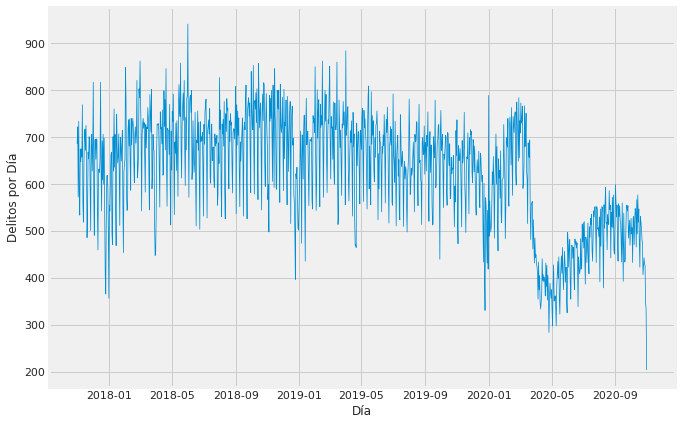

In [34]:
## Algo posiblemente más interesante se puede ver si comparamos la serie de tiempo de los ultimos 3 años:

plt.figure(figsize=(10,7))
df_year.groupby('fecha_simple')['ao_hechos'].count().plot( linewidth=.75)
plt.xlabel('Día')
plt.ylabel('Delitos por Día')
plt.show()

In [ ]:
## Vemos una caída grande en los delitos, debido al coronavirus

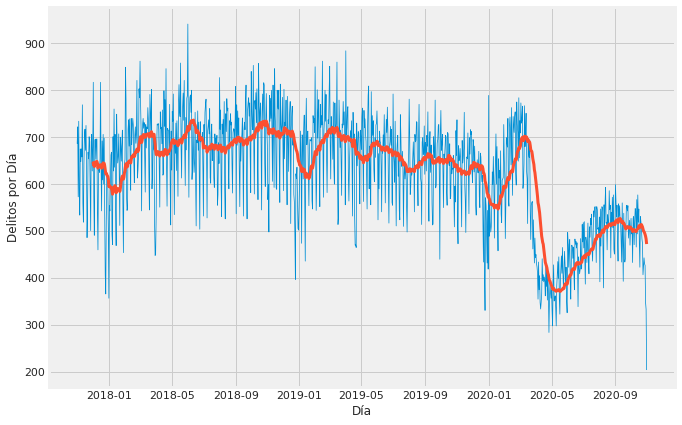

In [35]:
# Aqui vemos lo mismo con el rolling average de 100 dias.

plt.figure(figsize=(10,7))
df_year.groupby('fecha_simple')['ao_hechos'].count().plot( linewidth=.75)
df_year.groupby('fecha_simple')['ao_hechos'].count().rolling(30).mean().plot( linewidth=3)
plt.xlabel('Día')
plt.ylabel('Delitos por Día')
plt.show()

In [36]:
## Durante este periodo podemos hacer una 'seasonal decomposition' mensual
## tomamos como base el promedio de delitos cometidos por mes

df_season = df_year.groupby('fecha_simple').count().reset_index()
df_season = df_season.set_index('fecha_simple')
df_season.index = pd.to_datetime(df_season.index)

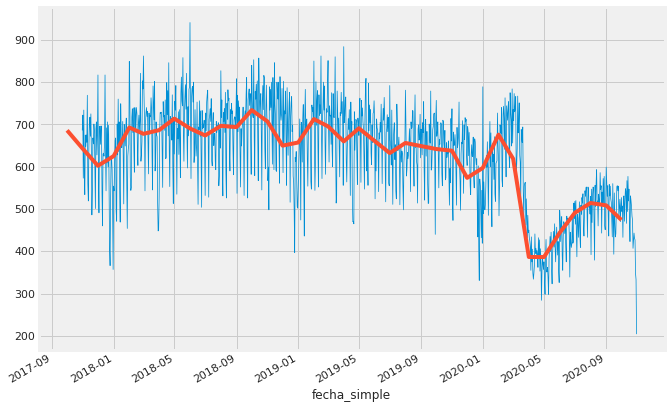

In [37]:
plt.figure(figsize=(10,7))
df_year.groupby('fecha_simple')['ao_hechos'].count().plot( linewidth=.75)
df_season.resample('MS').mean()['ao_hechos'].plot()
plt.show()

In [38]:
y = df_season.resample('MS').mean()['ao_hechos'] ## Hacemos un resampling mensual 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


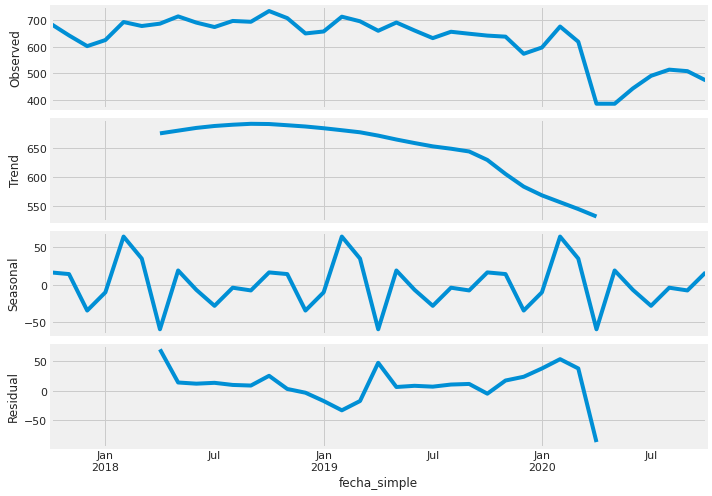

In [39]:
# Hacemos ahora la descomposición estacional. Se observa la tendencia decreciente al final del periodo
# Se observa un claro seasonality de los incidentes mensuales

import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [ ]:
## De tal forma que, aún con la baja de delitos debido al coronavirus, se sigue apreciando el efecto estacional. 

In [45]:
## Sólo por completez, podemos hacer un análisis similar con la libreria Prophet
from fbprophet import Prophet

In [50]:
# Lo hacemos mensualmente
y_p = y.reset_index()
y_p = y_p.rename(columns={'fecha_simple':'ds','ao_hechos':'y'}) # Formato de columnas para Prophet

In [51]:
y_p.head()

,ds,y
0,2017-10-01,686.000000
1,2017-11-01,642.500000
2,2017-12-01,602.322581
3,2018-01-01,625.161290
4,2018-02-01,692.750000


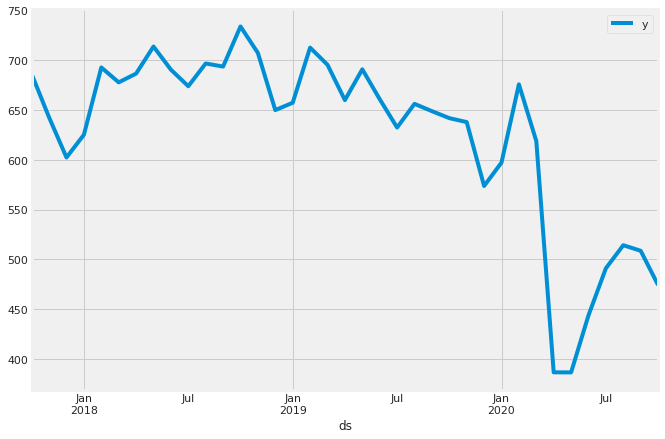

In [52]:
ax = y_p.set_index('ds').plot(figsize=(10, 7))
plt.show()

In [53]:
# Creamos instancia de nuestro modelo
# Lo hacemos con un intervalo de confianza de 95%

my_model = Prophet(interval_width=0.95) 
my_model.fit(y_p)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
# El mismo Prophet nos permite crear las fechas futuras
# Creamos 12 meses en el futuro

future_dates = my_model.make_future_dataframe(periods=12, freq='MS') 
future_dates.head()

,ds
0,2017-10-01
1,2017-11-01
2,2017-12-01
3,2018-01-01
4,2018-02-01


In [55]:
 # Con las fechas futuras, creamos predicciones
 # Se genera una tabla con la proyección media y sus márgenes de error

forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() 

,ds,yhat,yhat_lower,yhat_upper
44,2021-06-01,308.531520,249.218845,364.918132
45,2021-07-01,318.981823,264.507972,377.175122
46,2021-08-01,334.929653,273.386901,394.001644
47,2021-09-01,324.221940,264.601370,383.309952
48,2021-10-01,303.316914,244.653206,368.212674


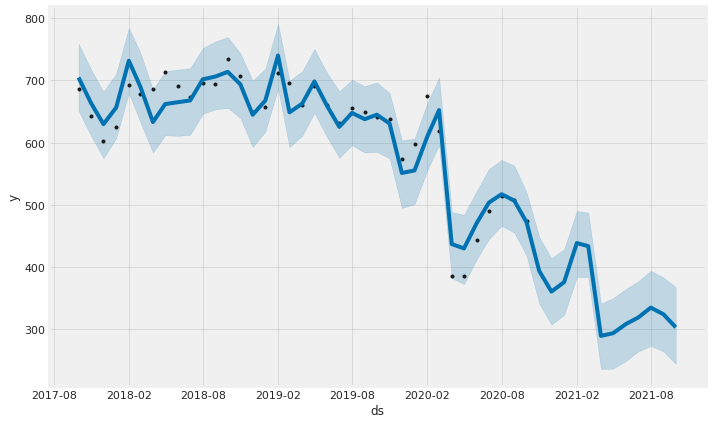

In [56]:
# Los puntos negros son los datos reales/ la linea solida es la proyeccion

# Vemos que Prophet predice, a grandes rasgos, que el numero promedio de incidentes mensuales disminuirá.

my_model.plot(forecast,uncertainty=True); 

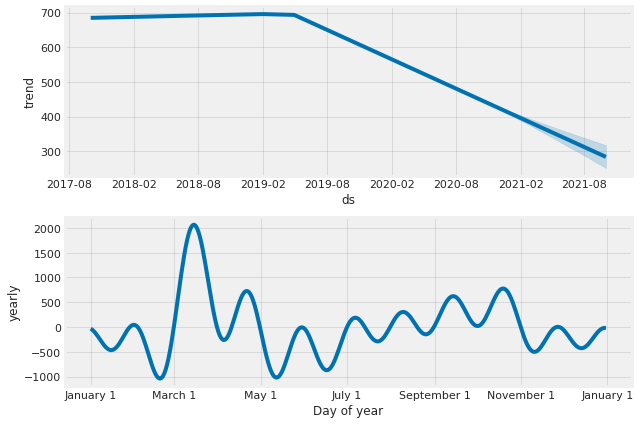

In [57]:
# Los componentes de la proyeccion:la tendendia a la baja, notoriamente.

my_model.plot_components(forecast); 

In [59]:
# Repetimos lo mismo, tomando ahora un sampling semanal

y_w = df_season.resample('W').mean()['ao_hechos'] ## Sampling semanal
y_pw = y_w.reset_index()
y_pw = y_pw.rename(columns={'fecha_simple':'ds','ao_hechos':'y'})

In [60]:
my_model_w = Prophet(interval_width=0.95)
my_model_w.fit(y_pw)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future_dates_w = my_model_w.make_future_dataframe(periods=52, freq='W') # Proyectamos 52 semanas en el futuro: un año approx.
future_dates_w.head()

,ds
0,2017-11-05
1,2017-11-12
2,2017-11-19
3,2017-11-26
4,2017-12-03


In [62]:
forecast_w = my_model_w.predict(future_dates_w)
forecast_w[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2021-10-03,322.849145,225.436622,409.747277
205,2021-10-10,324.193354,232.787907,426.076161
206,2021-10-17,309.585673,217.235487,398.433552
207,2021-10-24,286.551058,194.389903,376.314537
208,2021-10-31,265.876181,174.523807,364.700460


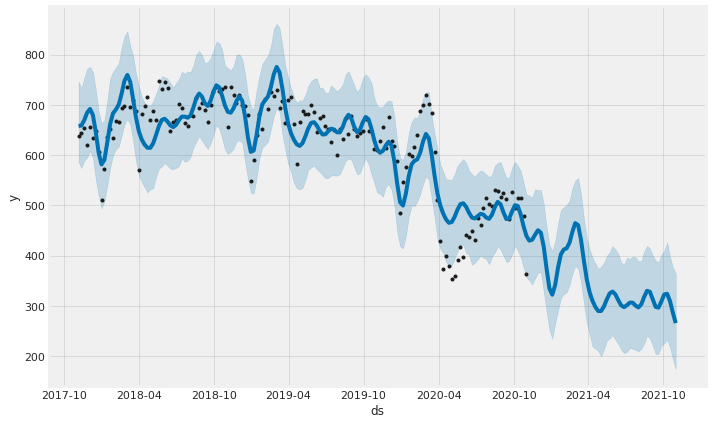

In [63]:
# Al hacer el modelo semanal, vemos que Prophet predice una baja del prom. de incidentes por semana.

my_model_w.plot(forecast_w,uncertainty=True);

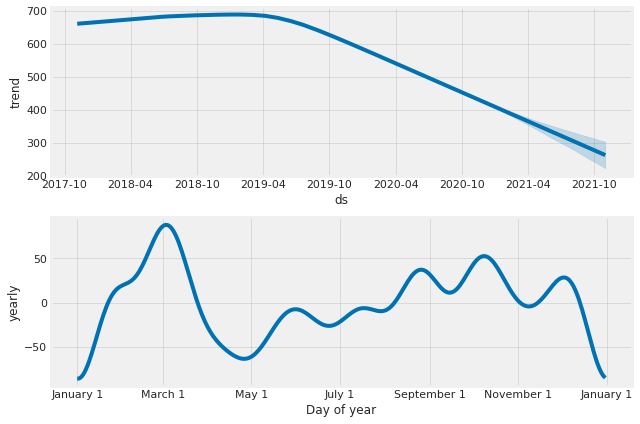

In [64]:
# Comparado con el modelo mensual, la baja es más pronunciada en el modelo semanal.

my_model_w.plot_components(forecast_w);

In [65]:
## Otro aspecto interesante es el siguiente: 
## Contruyamos un dataframe con la cuenta de incidentes por fecha

df_count = pd.DataFrame(df_year.groupby('fecha_simple')['ao_hechos'].count())
df_count.head()

,ao_hechos
fecha_simple,
2017-10-31,686
2017-11-01,722
2017-11-02,573
2017-11-03,734
2017-11-04,580


In [66]:
# Calculamos la diferenca logarítmica de incidentes por día:

df_count['log_change'] = np.log(df_count['ao_hechos']/ df_count['ao_hechos'].shift(1))

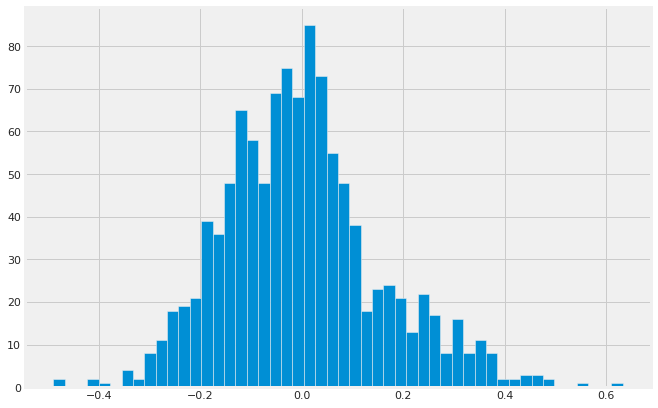

In [67]:
# Insight!! la distribución del cambio logaritmico es quasi-normal

plt.figure(figsize=(10,7))
plt.hist(df_count['log_change'].dropna(),bins=50)
plt.show()

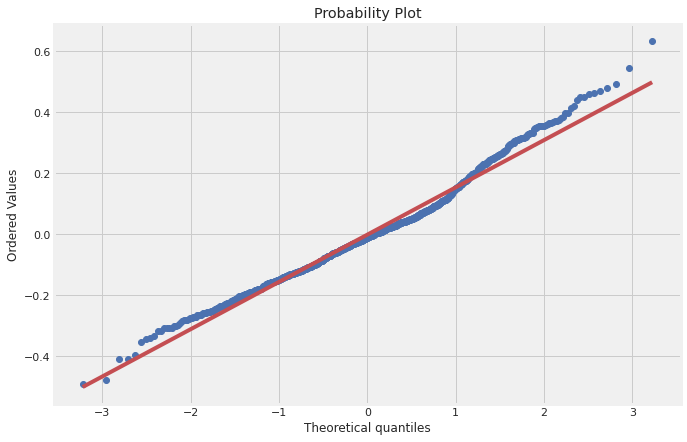

In [68]:
# Hacemos un QQ plot para comprobar la quasi-normalidad de la distribución
# Solo difiere en las colas
from scipy import stats

plt.figure(figsize=(10,7))
stats.probplot(df_count['log_change'].dropna(), plot=plt)
plt.show()

In [ ]:
## Esto muy interesante, porque nos puede dar una distribución aproximada para calcular probabilidades de eventos 
## Por ejemplo: cuál es la probabilidad de que el crimen baje durante un cierto tiempo un cierto porcentaje. etc.

**8 - ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.**

In [ ]:
## Por simplificar, tomaría primero los delitos más comunes en toda la ciudad (delitos con un mas de 1% de incidencia).
## Es probable que haciendo esto excluyamos algo, pero como first approximation no está mal.
## Una razón más para hacer esto, es para obtener una buena visualización. 

In [69]:
## Tomamos el data frame df_cdmx
## Contamos cuantas incidencias hay en cada alcaldía de cada uno de estos delitos
## y dividimos esto entre el número de incidencias totales de dicho delito

df_ratio = pd.DataFrame(index=alcaldias_cdmx)

for delito in delitos_relevantes:
  lista_ratio =[]
  for alcaldia in alcaldias_cdmx:
      
      lista_ratio.append((df_cdmx[(df_cdmx['alcaldia_hechos'] == alcaldia) & (df_cdmx['delito'] == delito)]['ao_hechos'].count())/(df_cdmx[ (df_cdmx['delito'] == delito)]['ao_hechos'].count()))
  df_ratio[delito] = lista_ratio

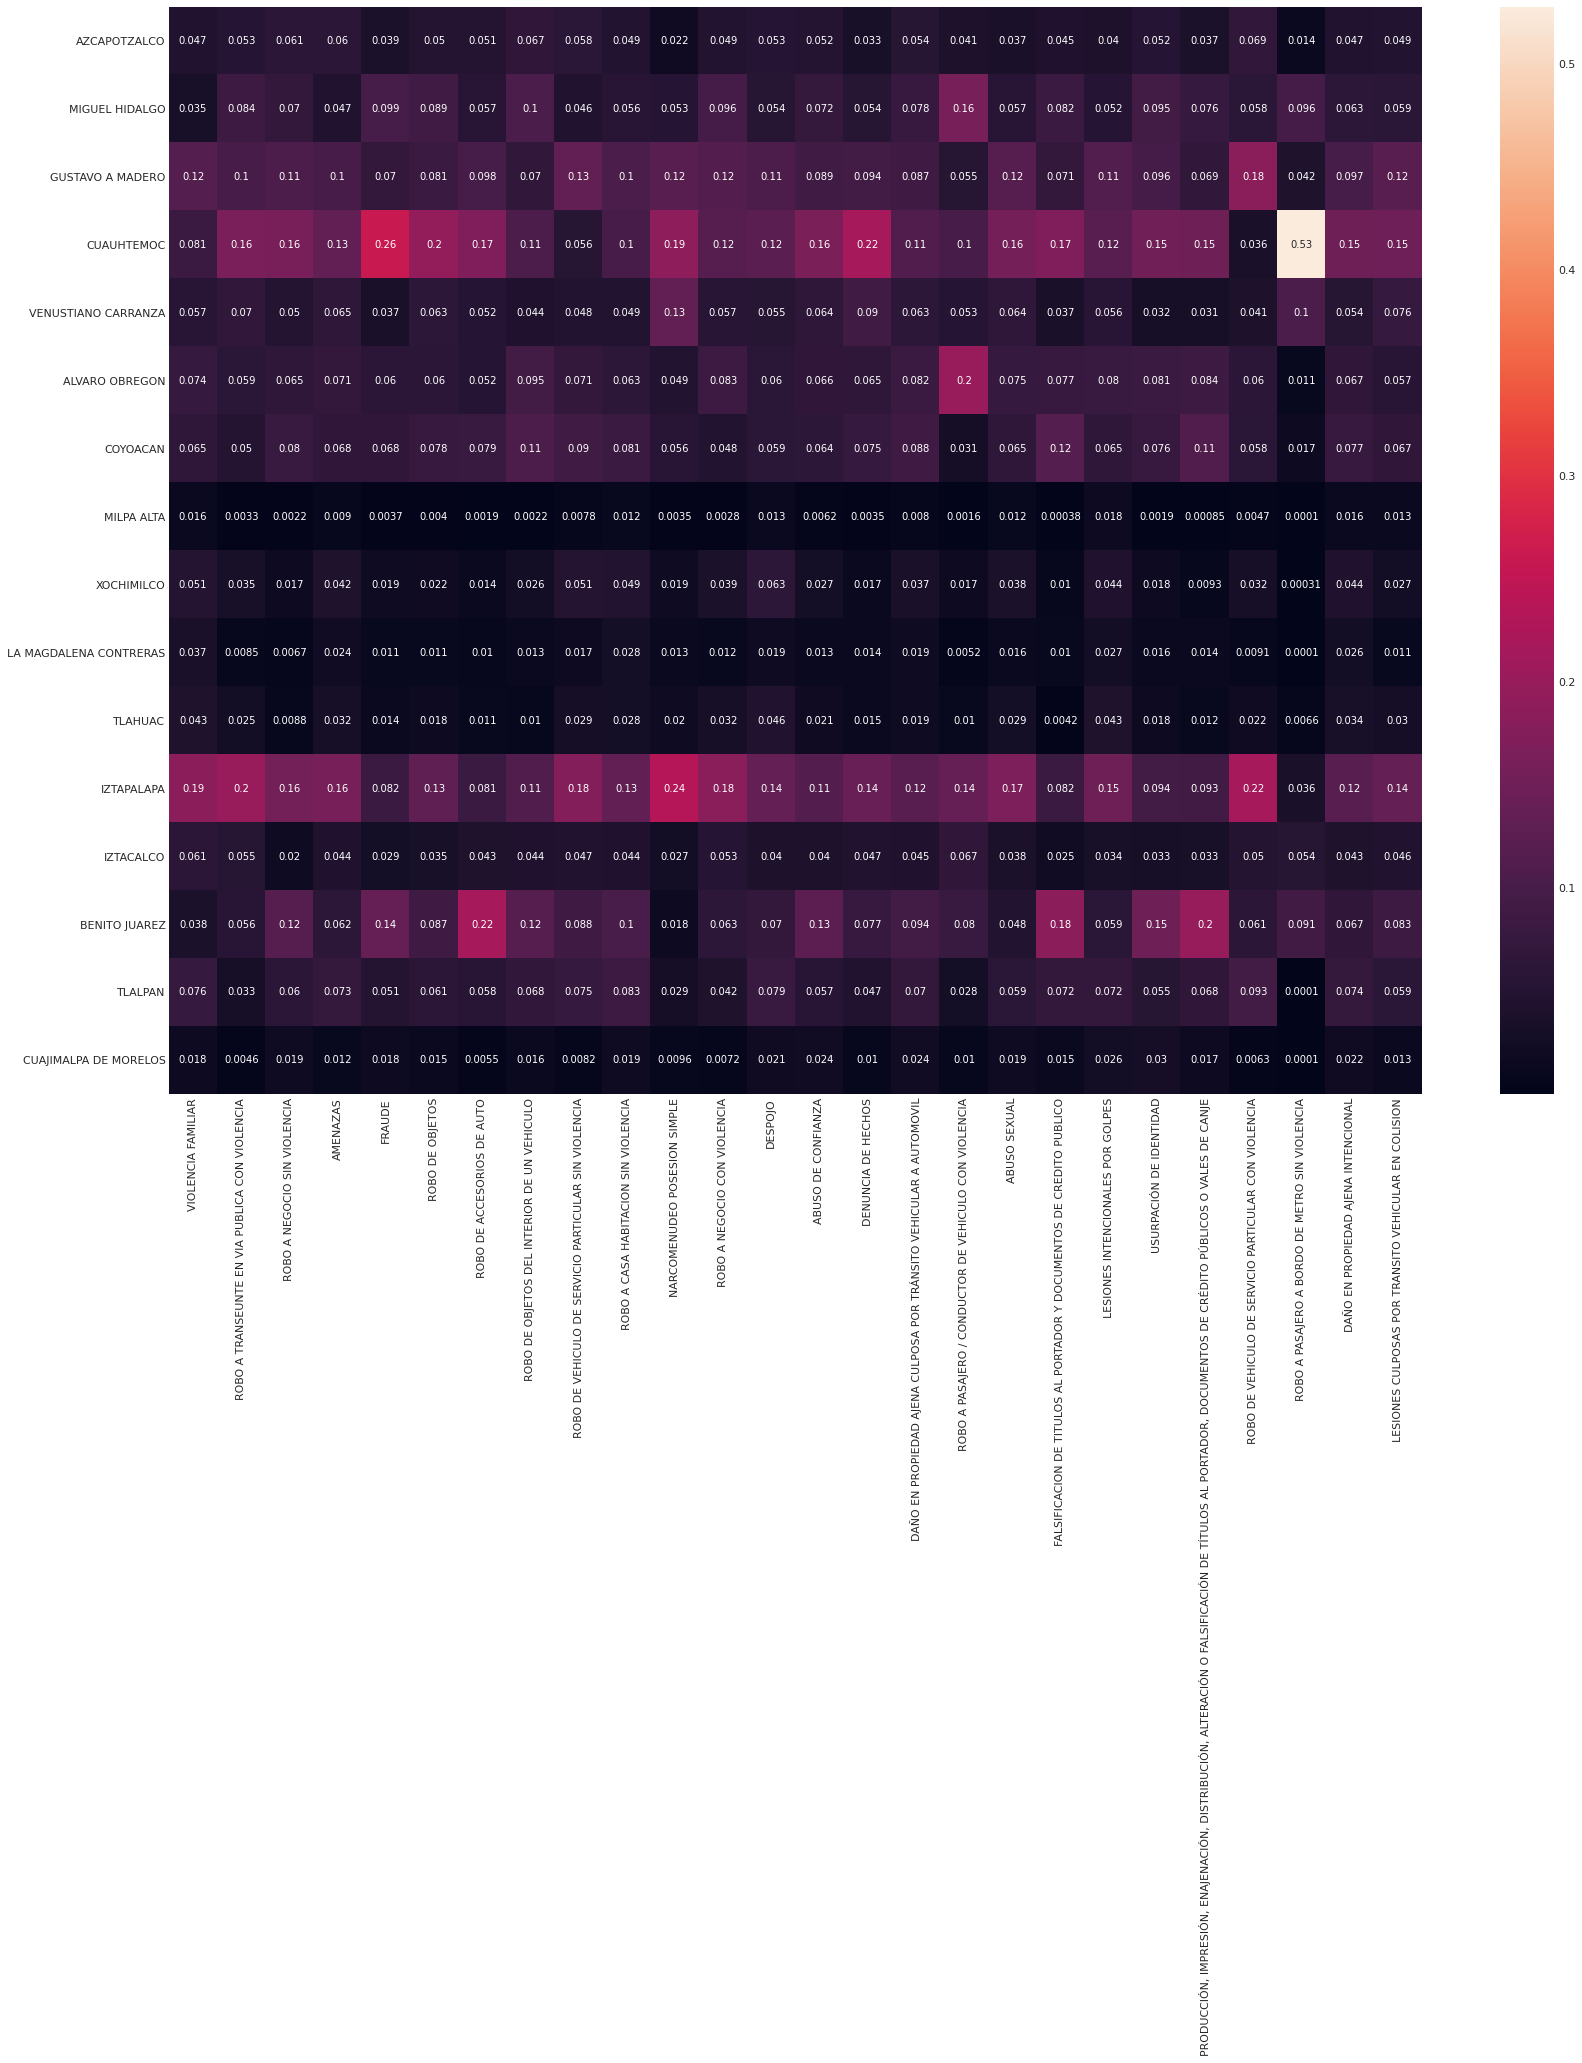

In [70]:
# Obtenemos el siguiente heatmap, que compara la delegación y delito y nos da el ratio de ocurrencias de ese delito por alcaldia.

plt.figure(figsize=(25,20))
sns.heatmap(df_ratio,annot=True)
plt.show()

In [ ]:
## En particular, vemos que en la alcaldía Cuauhtemoc, su delito característico es el robo en metro sn violencia. 
## Otro ejemplo es Iztapalapa, con narcomenudeo simple.

**9 - Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada
Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de
población no esté actualizado).**

In [71]:
## Sacaré los datos de población por alcaldía de: http://www.cuentame.inegi.org.mx/monografias/informacion/df/territorio/div_municipal.aspx?tema=me&e=09

pd.read_html('http://www.cuentame.inegi.org.mx/monografias/informacion/df/territorio/div_municipal.aspx?tema=me&e=09')[1]

,0,1,2
0,Clave Demarcación territorial Habitantes (aÃ±...,NaN,NaN
1,Clave,Demarcación territorial,Habitantes (aÃ±o 2015)
2,002,Azcapotzalco,400 161
3,003,Coyoacán,608 479
4,004,Cuajimalpa de Morelos,199 224
5,005,Gustavo A. Madero,1 164 477
6,006,Iztacalco,390 348
7,007,Iztapalapa,1 827 868
8,008,La Magdalena Contreras,243 886
9,009,Milpa Alta,137 927


In [72]:
poblacion_alcaldia = [400161,364439,1164477,532553,427263,749982,608479,137927,415933,243886,361593,1827868,390348,417416,677104,199224]
df_poblacion = pd.DataFrame({'alcaldia':alcaldias_cdmx,'poblacion':poblacion_alcaldia})
df_poblacion

,alcaldia,poblacion
0,AZCAPOTZALCO,400161
1,MIGUEL HIDALGO,364439
2,GUSTAVO A MADERO,1164477
3,CUAUHTEMOC,532553
4,VENUSTIANO CARRANZA,427263
5,ALVARO OBREGON,749982
6,COYOACAN,608479
7,MILPA ALTA,137927
8,XOCHIMILCO,415933
9,LA MAGDALENA CONTRERAS,243886


In [ ]:
## Hacemos un data frame con numero total de delito y poblacion por alcaldía

In [73]:
alcaldia = []
count = []
pop = []
for index in df_cdmx.groupby('alcaldia_hechos')['ao_hechos'].count().index:
  alcaldia.append(index)
  count.append(df_cdmx.groupby('alcaldia_hechos')['ao_hechos'].count().loc[index])

df_alcaldia = pd.DataFrame()
df_alcaldia['alcaldia'] = alcaldia
df_alcaldia['cuenta'] = count

In [74]:
## Aqui tenemos el número de delitos por alcaldia

df_alcaldia = df_alcaldia.sort_values('alcaldia')
df_alcaldia

,alcaldia,cuenta
0,ALVARO OBREGON,73821
1,AZCAPOTZALCO,53295
2,BENITO JUAREZ,92913
3,COYOACAN,73277
4,CUAJIMALPA DE MORELOS,15992
5,CUAUHTEMOC,173586
6,GUSTAVO A MADERO,110047
7,IZTACALCO,45921
8,IZTAPALAPA,165486
9,LA MAGDALENA CONTRERAS,17347


In [75]:
## Finalmente, construimos un dataframe con el número de delitos por población para cada alcaldía.

df_poblacion = df_poblacion.sort_values('alcaldia')
df_alcaldia['poblacion'] = df_poblacion['poblacion']
df_alcaldia['poblacion'] = df_poblacion['poblacion']
df_alcaldia['delito_por_habitante'] = df_alcaldia['cuenta']/df_alcaldia['poblacion'] ## Hacemos el ratio de crimenes totales entre habitantes de alcaldía
df_alcaldia

,alcaldia,cuenta,poblacion,delito_por_habitante
0,ALVARO OBREGON,73821,400161,0.184478
1,AZCAPOTZALCO,53295,364439,0.146238
2,BENITO JUAREZ,92913,1164477,0.079789
3,COYOACAN,73277,532553,0.137596
4,CUAJIMALPA DE MORELOS,15992,427263,0.037429
5,CUAUHTEMOC,173586,749982,0.231454
6,GUSTAVO A MADERO,110047,608479,0.180856
7,IZTACALCO,45921,137927,0.332937
8,IZTAPALAPA,165486,415933,0.397867
9,LA MAGDALENA CONTRERAS,17347,243886,0.071127


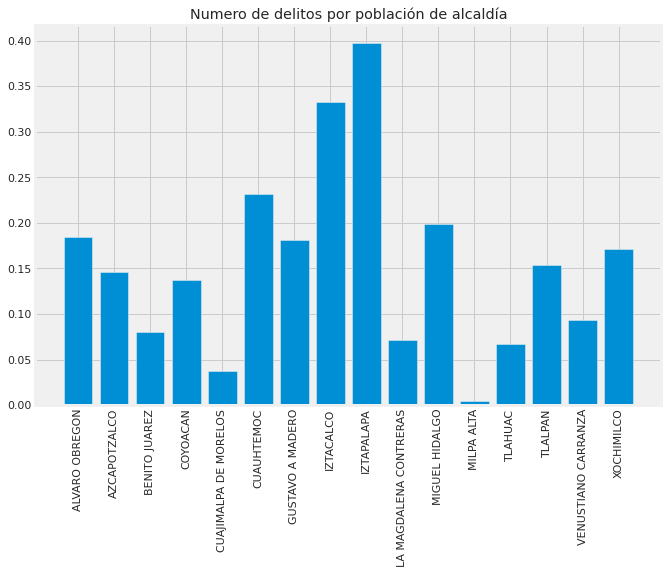

In [77]:
x = df_alcaldia['alcaldia']
y = df_alcaldia['delito_por_habitante']

plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Numero de delitos por población de alcaldía')
plt.show()

In [ ]:
## Vemos que la alcaldía con más crimen por persona es Iztapalapa.

In [78]:
## Curiosamente, no se observa ninguna correlación entre poblacion y numero de delitos

df_alcaldia[['poblacion','cuenta']].corr()

,poblacion,cuenta
poblacion,1.000000,-0.003596
cuenta,-0.003596,1.000000


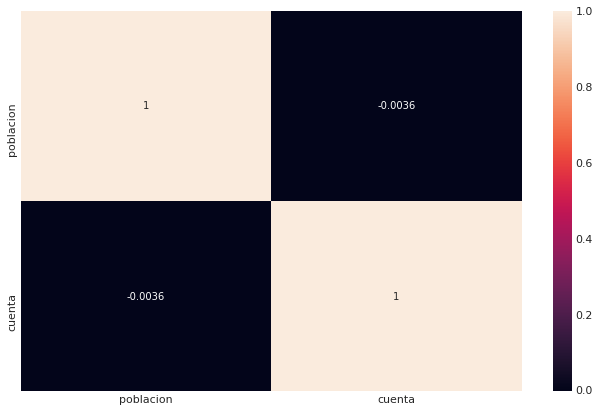

In [79]:
sns.heatmap(df_alcaldia[['poblacion','cuenta']].corr(),annot=True)

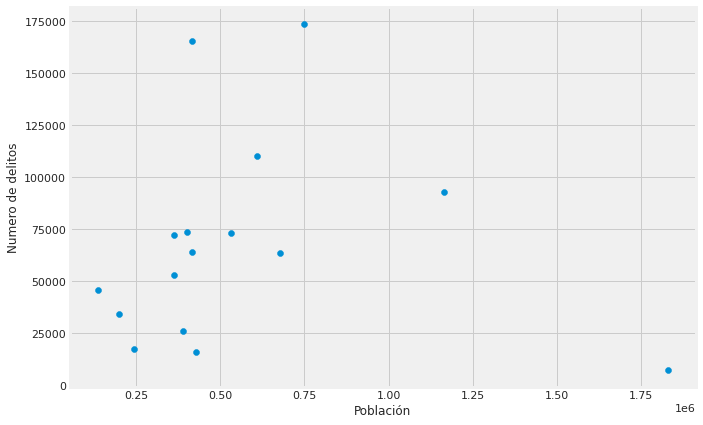

In [80]:
x = df_alcaldia['poblacion']
y = df_alcaldia['cuenta']

plt.scatter(x,y)
plt.xlabel('Población')
plt.ylabel('Numero de delitos')
plt.show()

In [ ]:
### Podemos hacer un mapa tentativo con esta información de la siguiente forma:

In [82]:
def delito_por_habitante(alcaldia):
  return df_alcaldia[df_alcaldia['alcaldia']==alcaldia]['delito_por_habitante'].iloc[0]

In [83]:
df_cdmx['delito_por_habitante'] = df_cdmx['alcaldia_hechos'].apply(lambda x: delito_por_habitante(x))

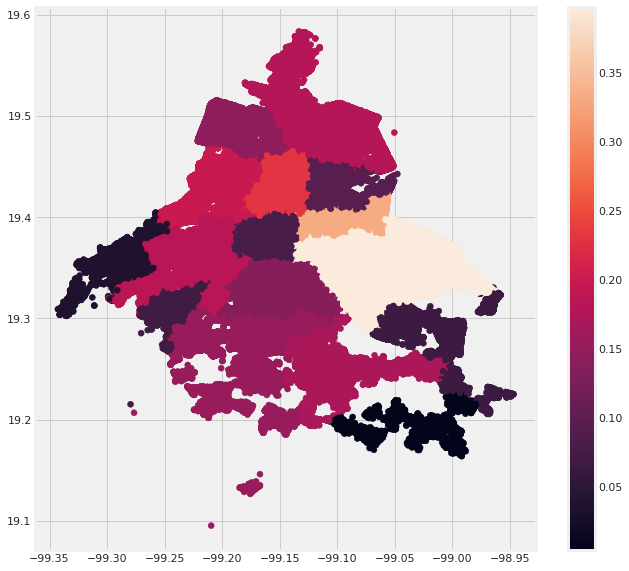

In [84]:
x = df_cdmx['longitud']
y = df_cdmx['latitud']
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=df_cdmx['delito_por_habitante'])
plt.colorbar()
plt.show()

**10 - ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de
desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).**


**11 - Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra
patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de
Machine Learning no supervisados).
a) ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en
común?**

In [ ]:
## Una indicador relativamente simple de seguridad podría ser la cantidad de delitos por area. 
## Para esto podemos utlizar la infomación geográfica de nuestros datos. 
## Concretamente, podemos tomar una cuadrícula de la ciudad y contar el número de delitos por cada cuadro.

In [85]:
# Por simplicidad, creamos un dataframe con la info geográfica únicamente:

df_geo = df_cdmx[['longitud','latitud']]
df_geo.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



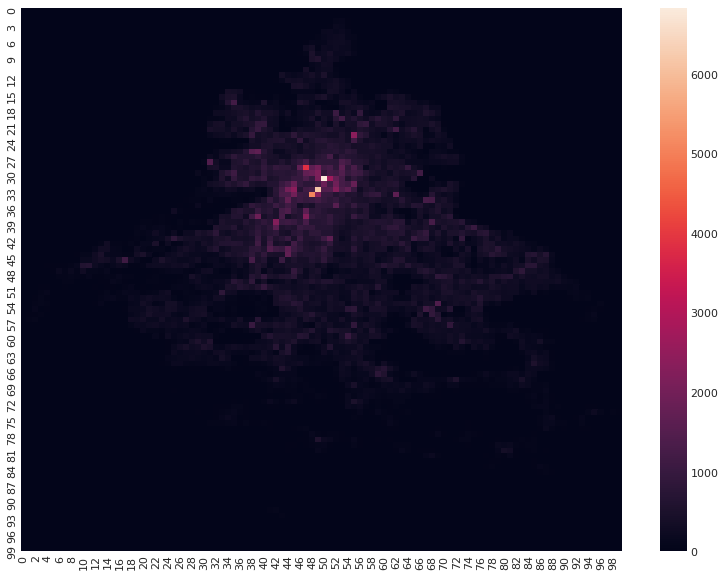

In [86]:
# Creamos una cuadrícula para ver la intensidad de incidentes por area.
# Insight: Vemos claramente que hay una gran cantidad de crimenes en el centro de la ciudad
# Asimismo, vemos que muchos crimenes están distribuidos sobre avenidas importantes.


long_max = df_geo.longitud.max()
long_min = df_geo.longitud.min()

lat_max = df_geo.latitud.max()
lat_min = df_geo.latitud.min()

N = 100

lat_int = (lat_max - lat_min)/N
long_int = (long_max - long_min)/N

record = []
for i in range(N):
  for j in range(N):
    record.append(df_geo[(df_geo['longitud']>= long_min + j*long_int) & (df_geo['longitud']<= long_min + (j+1)*long_int) & (df_geo['latitud']>= lat_min +  (N-i)*lat_int) & (df_geo['latitud']<= lat_min + ( (N-i)+1)*lat_int) ]['latitud'].count())

plt.figure(figsize=(12,10))
sns.heatmap(pd.DataFrame(data =np.reshape(np.array(record),(N,N))))

In [ ]:
## Esto es con una cuadricula de 100*100 
## Encontramos claramente puntos geográficos de concentración de delitos
## Podemos refinar la cuadricula a 250*250:

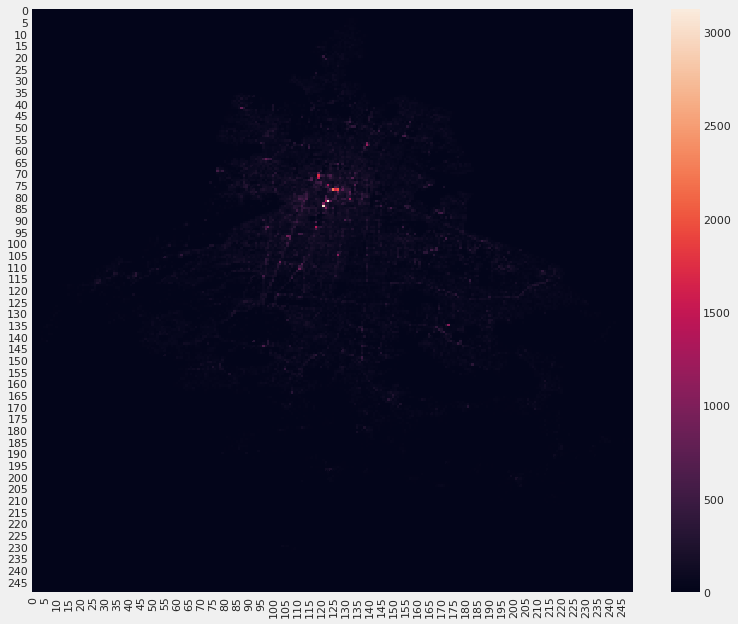

In [ ]:
long_max = df_geo.longitud.max()
long_min = df_geo.longitud.min()

lat_max = df_geo.latitud.max()
lat_min = df_geo.latitud.min()

N = 250

lat_int = (lat_max - lat_min)/N
long_int = (long_max - long_min)/N

record = []
for i in range(N):
  for j in range(N):
    record.append(df_geo[(df_geo['longitud']>= long_min + j*long_int) & (df_geo['longitud']<= long_min + (j+1)*long_int) & (df_geo['latitud']>= lat_min +  (N-i)*lat_int) & (df_geo['latitud']<= lat_min + ( (N-i)+1)*lat_int) ]['latitud'].count())

plt.figure(figsize=(12,10))
sns.heatmap(pd.DataFrame(data =np.reshape(np.array(record),(N,N))))

In [ ]:
## Podemos ver que los delitos se concentran en el centro de la ciudad y en las avenidas grandes. 
## Esta división cuadricular puede ser el inicio para aplicar algoritmos ML no supervisados. 

**12 - Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con
y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos
delitos?**

In [87]:
df_trans = df_cdmx[(df_cdmx['delito'] == 'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA') |  (df_cdmx['delito'] == 'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA') ]

In [88]:
df_trans.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,datetime_hechos,mes,dia_semana,hora,fecha_simple,delito_por_habitante
208,2017.0,Noviembre,2017-11-16 17:08:00,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,AZCAPOTZALCO,AMPLIACIÓN SAN PEDRO XALPA,2017,Noviembre,2017-11-16 18:01:20,CALZ. DE LAS ARMAS,NaN,-99.219985,19.479098,"19.4790975076,-99.2199848126",2017-11-16 17:08:00,11,3,17,2017-11-16,0.146238
520,2017.0,Noviembre,2017-11-17 21:30:00,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-2CD,IZTAPALAPA,SAN MIGUEL TEOTONGO,2017,Noviembre,2017-11-17 22:00:33,TIERRA BLANCA,NaN,-98.987628,19.349364,"19.3493636337,-98.9876278111",2017-11-17 21:30:00,11,4,21,2017-11-17,0.397867
570,2017.0,Noviembre,2017-11-18 07:50:00,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-3CD,CUAUHTEMOC,PERALVILLO,2017,Noviembre,2017-11-18 09:00:58,CALZADA DE GUADALUPE,COBRE,-99.127055,19.459715,"19.4597149801,-99.1270554851",2017-11-18 07:50:00,11,5,7,2017-11-18,0.231454
652,2017.0,Noviembre,2017-11-17 06:15:00,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-3SD,AZCAPOTZALCO,NEXTENGO,2017,Noviembre,2017-11-18 15:59:30,AV. AQUILES SERDAN,NaN,-99.188790,19.476347,"19.4763470131,-99.1887896015",2017-11-17 06:15:00,11,4,6,2017-11-17,0.146238
737,2017.0,Noviembre,2017-11-19 07:25:00,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-1CD,IZTAPALAPA,LOS ÁNGELES APANOAYA,2017,Noviembre,2017-11-19 08:42:02,PERIFERICO,NOCHE BUENA,-99.062087,19.342229,"19.3422285938,-99.062087274",2017-11-19 07:25:00,11,6,7,2017-11-19,0.397867


In [ ]:
## Hacemos el mismo análisis gráfico que hicimos antes, pero ahora solo con estos delitos:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



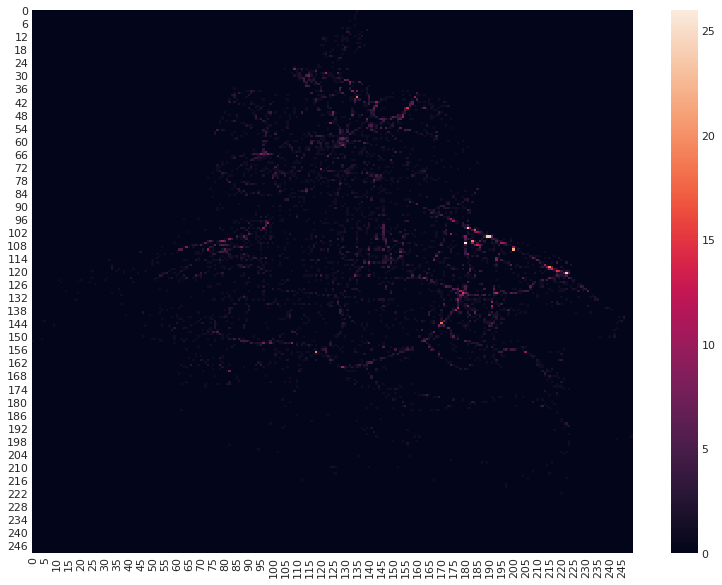

In [89]:
df_geo_trans = df_trans[['longitud','latitud']]
df_geo_trans.dropna(inplace=True)

long_max = df_geo_trans.longitud.max()
long_min = df_geo_trans.longitud.min()

lat_max = df_geo_trans.latitud.max()
lat_min = df_geo_trans.latitud.min()

N = 250

lat_int = (lat_max - lat_min)/N
long_int = (long_max - long_min)/N

record = []
for i in range(N):
  for j in range(N):
    record.append(df_geo_trans[(df_geo_trans['longitud']>= long_min + j*long_int) & (df_geo_trans['longitud']<= long_min + (j+1)*long_int) & (df_geo_trans['latitud']>= lat_min +  (N-i)*lat_int) & (df_geo_trans['latitud']<= lat_min + ( (N-i)+1)*lat_int) ]['latitud'].count())

plt.figure(figsize=(12,10))
sns.heatmap(pd.DataFrame(data =np.reshape(np.array(record),(N,N))))


In [ ]:
## Se constata visualmente que la ruta 'San Lorenzo - San Vincente' es la que más delitos tiene. 
## Si visualizamos con menor resolución, podemos ver más claramente las avenidas.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


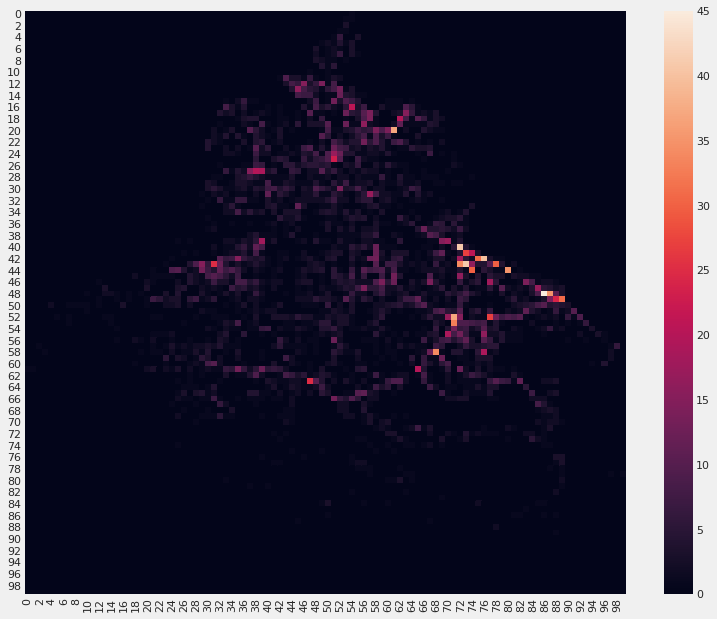

In [ ]:
df_geo_trans = df_trans[['longitud','latitud']]
df_geo_trans.dropna(inplace=True)

long_max = df_geo_trans.longitud.max()
long_min = df_geo_trans.longitud.min()

lat_max = df_geo_trans.latitud.max()
lat_min = df_geo_trans.latitud.min()

N = 100

lat_int = (lat_max - lat_min)/N
long_int = (long_max - long_min)/N

record = []
for i in range(N):
  for j in range(N):
    record.append(df_geo_trans[(df_geo_trans['longitud']>= long_min + j*long_int) & (df_geo_trans['longitud']<= long_min + (j+1)*long_int) & (df_geo_trans['latitud']>= lat_min +  (N-i)*lat_int) & (df_geo_trans['latitud']<= lat_min + ( (N-i)+1)*lat_int) ]['latitud'].count())

plt.figure(figsize=(12,10))
sns.heatmap(pd.DataFrame(data =np.reshape(np.array(record),(N,N))))

In [ ]:
## Esto es más claro al verlo con menor resolución. 
## Podemos obtener más información cuantitativa analizando el dataframe:

In [94]:
## Este es el número de delitos por calle en la categoría indicada
df_trans['calle_hechos'].value_counts().head(20)

CALZADA IGNACIO ZARAGOZA        215
PERIFERICO                       81
ANILLO PERIFERICO                81
PERIFERICO SUR                   60
AVENIDA TLAHUAC                  55
CALZ. IGNACIO ZARAGOZA           50
ERMITA IZTAPALAPA                49
CALZADA DE TLALPAN               49
AVENIDA PERIFERICO               45
EJE CENTRAL LAZARO CARDENAS      44
CALZADA ERMITA IZTAPALAPA        43
AVENIDA CENTENARIO               38
CALZ. GRAL. IGNACIO ZARAGOZA     38
AVENIDA UNIVERSIDAD              36
RIO CHURUBUSCO                   32
AV. TLAHUAC                      32
CANAL DE CHALCO                  32
IGNACIO ZARAGOZA                 30
AVENIDA ERMITA IZTAPALAPA        28
CAMINO REAL A TOLUCA             27
Name: calle_hechos, dtype: int64

Solo para terminar, consideremos otro posible enfoque de cómo podriamos hacer unsupervised learning. Un posible ataque sería hacer vectorizar los datos que presentamos arriba como heat map, y hacer divisiones geográficas. 

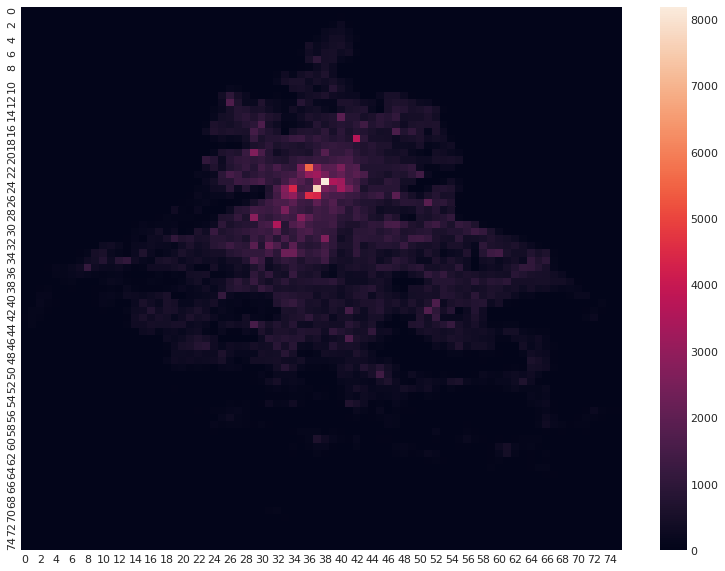

In [128]:

## Empezamos con esto:

long_max = df_geo.longitud.max()
long_min = df_geo.longitud.min()

lat_max = df_geo.latitud.max()
lat_min = df_geo.latitud.min()

N = 76

lat_int = (lat_max - lat_min)/N
long_int = (long_max - long_min)/N

record = []
for i in range(N):
  for j in range(N):
    record.append(df_geo[(df_geo['longitud']>= long_min + j*long_int) & (df_geo['longitud']<= long_min + (j+1)*long_int) & (df_geo['latitud']>= lat_min +  (N-i)*lat_int) & (df_geo['latitud']<= lat_min + ( (N-i)+1)*lat_int) ]['latitud'].count())

plt.figure(figsize=(12,10))
sns.heatmap(pd.DataFrame(data =np.reshape(np.array(record),(N,N))))

In [129]:
# La cuadricula graficada arriba esta dada por este dataframe:

cuad = pd.DataFrame(data =np.reshape(np.array(record),(N,N))) 

In [130]:
## lo reescribimos como vectores:
y_coord = []
x_coord = []
label = []

for i in cuad.index:
  for j in cuad.columns:
    #print(i,j,cuad[j][i])
    y_coord.append(N-1 - i )
    x_coord.append(j)
    label.append(cuad[j][i])

In [131]:
vec = pd.DataFrame({'x':x_coord,'y':y_coord,'label':label})
vec.head()

,x,y,label
0,0,75,0
1,1,75,0
2,2,75,0
3,3,75,0
4,4,75,0


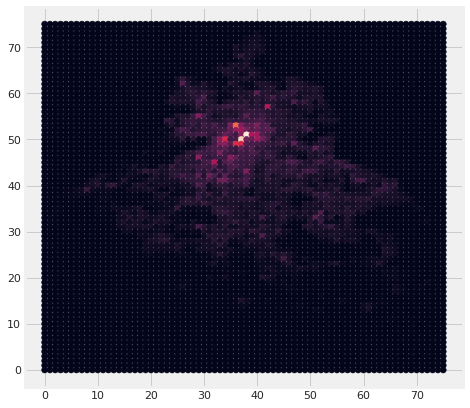

In [132]:
plt.figure(figsize=(7,7))
plt.scatter(vec['x'],vec['y'],c=label)
plt.show()

In [133]:
##Dividimos los delitos a grandes rasgos en divisiones de baja, media y alta densidad:

def intensity(x):
  if x < vec['label'].max()/4:
    return 0
  elif (x >= vec['label'].max()/4) & (x < vec['label'].max()*2/4):
    return 1
  elif (x >= vec['label'].max()*2/4) & (x < vec['label'].max()*3/4):
    return 2
  elif (x >= vec['label'].max()*3/4) & (x < vec['label'].max()*4/4):
    return 3

In [134]:
vec['intensity'] = vec['label'].apply(lambda x: intensity(x))

In [135]:
vec

,x,y,label,intensity
0,0,75,0,0.0
1,1,75,0,0.0
2,2,75,0,0.0
3,3,75,0,0.0
4,4,75,0,0.0
...,...,...,...,...
5771,71,0,0,0.0
5772,72,0,0,0.0
5773,73,0,0,0.0
5774,74,0,0,0.0


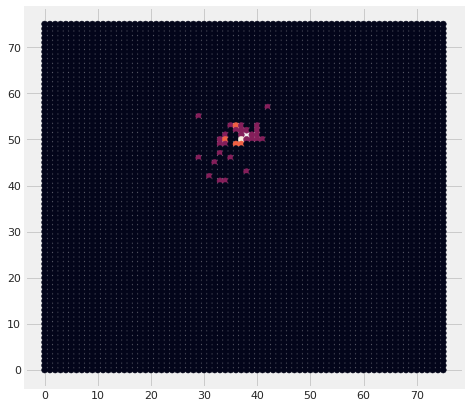

In [136]:
plt.figure(figsize=(7,7))

plt.scatter(vec['x'],vec['y'],c=vec['intensity'])
plt.show()

In [ ]:
## Caveat: es demasiado cuadriculado, pero es un buen first approach, y podemos jugar con los grados de intensidad
## El punto es poder en algun momento llegar a aplicar algoritmos ML de clustering. 